In [19]:
import numpy as np

import pandas as pd

import regex as re

import nltk

import matplotlib.pyplot as plt



from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from gensim.models import Word2Vec



import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
train_data = pd.read_csv('/content/train_data.txt',delimiter=':::',names=['Title','Genre','Description'])

test_data = pd.read_csv('/content/test_data.txt',delimiter=':::',names=['Title','Description'])

test_sol = pd.read_csv('/content/test_data_solution.txt',delimiter=':::',names=['Title','Genre','Description'])

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [24]:
# Check for null values

train_data.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [25]:
test_data.isnull().sum()

,0
Title,0
Description,0


In [26]:
# Shifting the target variable to the last column



columns = ['Title','Description','Genre']

train_data = train_data[columns]

train_data.head()

,Title,Description,Genre
1,Oscar et la dame rose (2009),Listening in to a conversation between his do...,drama
2,Cupid (1997),A brother and sister with a past incestuous r...,thriller
3,"Young, Wild and Wonderful (1980)",As the bus empties the students for their fie...,adult
4,The Secret Sin (1915),To help their unemployed father make ends mee...,drama
5,The Unrecovered (2007),The film's title refers not only to the un-re...,drama


In [27]:
test_data.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [28]:
# Total no of genre

train_data['Genre'].nunique()

27

In [29]:
# Types of genre the moives belong to

train_data['Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [30]:
# No of movies in each genre

train_data['Genre'].value_counts()

,count
Genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


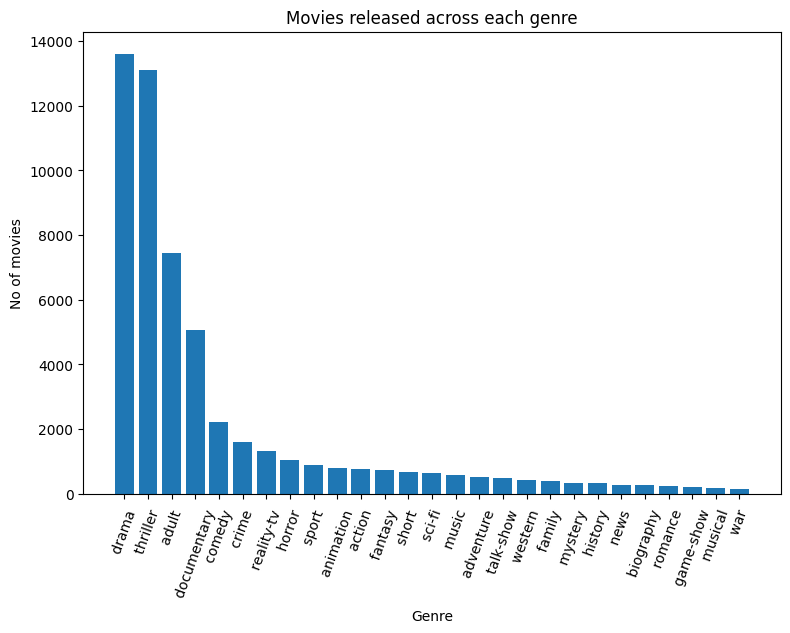

In [31]:
# Plotting the distribution of movies across each genre



plt.figure(figsize=(9,6))

plt.bar(train_data['Genre'].unique(),train_data['Genre'].value_counts())

plt.title('Movies released across each genre')

plt.xlabel('Genre')

plt.ylabel('No of movies')

plt.xticks(rotation = 70)

plt.show()

In [32]:
# Splitting the training data



x_train = train_data.iloc[:,1].values # Considering only the movie description as a feature to predict the genre of the movie

y_train = train_data.iloc[:,-1].values



# Selecting the testing data

x_test = test_data.iloc[:,-1].values # Considering only the movie description as a feature to predict the genre of the movie

# Text Preprocessing


In [34]:
def process_text(text):

    ''' This function performing text cleaning & converts words into it's base form '''



    # Convert to lowercase

    sentence = text.lower()



    # Removing username

    sentence = re.sub(r'@[a-zA-Z0-9_.]+','',sentence)



    # Removing URLs

    sentence = re.sub(r"https?://\S+|www\.\S+",'',sentence)
    # Character normalization

    sentence = re.sub(r"([a-zA-Z])\1{2,}", r'\1', sentence)



    # Removing punctuations

    sentence = re.sub(r'[^\w\s]','',sentence)



    # Removing stopwords & converting to lowercase

    english_stop = stopwords.words('english')

    sentence = ' '.join([word for word in sentence.split() if word not in english_stop])



    # Performing word tokenization
    sentence = word_tokenize(sentence) # Returns a list of words



    # Performing lemmatization
    lemmatizer = WordNetLemmatizer()

    sentence = ' '.join([lemmatizer.lemmatize(word) for word in sentence])



    return sentence

In [38]:
import nltk
nltk.download('wordnet')
x_train = [process_text(desc) for desc in x_train]

x_test = [process_text(desc) for desc in x_test]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [39]:
# Representing the processed text as a list of words



x_train_low = [desc.split() for desc in x_train]

x_test_low = [desc.split() for desc in x_test]

# Creating a vocabulary

In [40]:
vocab = []



for desc in x_train_low:

    for word in desc:

        if word not in vocab:

            vocab.append(word)

In [42]:
print("Size of vocabulary: ",len(vocab))

Size of vocabulary:  139848


# Creating feature vectors



```
# This is formatted as code
```

# TF- IDF

In [43]:
# Applying TF-IDF vectorizer



tf_idf = TfidfVectorizer(max_features = 5000)

train_vector = tf_idf.fit_transform(x_train)

test_vector = tf_idf.transform(x_test)

In [41]:
#Word2Vec

In [44]:
model = Word2Vec(sentences = x_train_low, vector_size = 100, epochs = 5, workers = 5)

In [45]:
words_in_model = model.wv.index_to_key

In [49]:
def word_in_vocab(sentence):

    ''' This fn checks if all the words present in the sentence is part of the vocabulary of the model or not '''



    total = 0

    no_of_words = len(sentence)



    for word in sentence:

        if word in words_in_model:

            total += 1
        if total != no_of_words:

    # If all words are not present in vocab of the model, we create a numpy array of zeros of same dimension as the word vector

         return False

    else:

        return True

In [50]:
# Creating train data & test data word vectors

train_wv = [model.wv[sentence].sum(axis = 0) if len(sentence) != 0 and word_in_vocab(sentence) else np.zeros((100)) for sentence in x_train_low]

test_wv = [model.wv[sentence].sum(axis = 0) if len(sentence) != 0 and word_in_vocab(sentence) else np.zeros((100)) for sentence in x_test_low]

In [ ]:
#Model Training using TF - IDF vectors

In [ ]:
#Logistic Regression

In [51]:
log_reg = LogisticRegression()

log_reg.fit(train_vector,y_train)

LogisticRegression()

In [52]:
log_pred = log_reg.predict(train_vector)

print('Accuracy Score: ',round(accuracy_score(log_pred,y_train),2))

Accuracy Score:  0.66


In [54]:
nb = GaussianNB()

nb.fit(train_vector.toarray(),y_train)

GaussianNB()

In [56]:
nb_pred = nb.predict(train_vector.toarray())

print('Accuracy Score: ',round(accuracy_score(nb_pred,y_train),2))

Accuracy Score:  0.36


In [ ]:
#Logistic Regression gives a better accuracy score compared to Naive Bayes in case of TF-IDF vectors.

In [ ]:
#Model Training using Word2Vec word embeddings

In [ ]:
#Logistic Regression

In [57]:
log_r = LogisticRegression()

log_r.fit(train_wv,y_train)

LogisticRegression()

In [58]:
log_p = log_r.predict(train_wv)

print('Accuracy Score: ',round(accuracy_score(log_p,y_train),2))

Accuracy Score:  0.25


In [ ]:
#Naive Bayes

In [59]:
nb = GaussianNB()

nb.fit(train_wv,y_train)

GaussianNB()

In [60]:
nb_pred = nb.predict(train_wv)

print('Accuracy Score: ',round(accuracy_score(nb_pred,y_train),2))

Accuracy Score:  0.02


In [ ]:
#We get better results with TF - IDF vector representations compared to Word2Vec word embeddings¶
#We will use Logistic Regression model trained using TF - IDF vectors that yields 67% accuracy(for train data) for prediction

In [61]:
# Prediction on test data

test_pred = log_reg.predict(test_vector)

In [62]:
test_sol['Predicted'] = test_pred

In [63]:
test_sol.head()

,Title,Genre,Description,Predicted
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",drama
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",drama
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,documentary
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",drama
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,drama


In [64]:
# No of correct predictions
total_movies = len(test_sol)

correct_predictions = 0



for movie in range(1,total_movies+1):

    if test_sol['Genre'][movie] == test_sol['Predicted'][movie]:

        correct_predictions += 1



print("Total no of movie genre predicted: ",total_movies,"\nNo of movie genre predicted right: ",correct_predictions,

      "\nPercentage of correct predictions: ",round((correct_predictions/total_movies)*100,0),"%")

Total no of movie genre predicted:  54200 
No of movie genre predicted right:  31667 
Percentage of correct predictions:  58.0 %
